# B"H

---

---

In [5]:
import os
import sys

# Import the regular expression module
import re

import iso8601

from datetime import datetime

from dateutil import tz

import pendulum

import numpy as np

import pandas as pd

from scipy.stats import zscore

import matplotlib.pyplot as plt

import seaborn as sns



---

In [8]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [12.0, 9.0]
Current size: [12, 9]


---

In [291]:
# -- -----------------------------------------------------------------
PROJ_ROOT = '../..'

print("------------------------------")
print("          PROJ_ROOT           ")
print(os.path.abspath(PROJ_ROOT))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# add the 'src' directory as one where we can import modules
src_dir = os.path.join(PROJ_ROOT, 'src')
sys.path.append(src_dir)


print("------------------------------")
print("           src_dir            ")
print(os.path.abspath(src_dir))
print("------------------------------")
print(" ")
# -- -----------------------------------------------------------------



# -- -----------------------------------------------------------------
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf
# -- -----------------------------------------------------------------

------------------------------
          PROJ_ROOT           
/home/laz/repos/coding-deep-dive/env-python-learn
------------------------------
 
------------------------------
           src_dir            
/home/laz/repos/coding-deep-dive/env-python-learn/src
------------------------------
 
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
## Data for use below

### `areas` dataset

In [295]:
areas = ["hallway", 11.25, "kitchen", 18.0, "living room", 20.0, "bedroom", 10.75, "bathroom", 9.50, "bedroom", 9.30]

### `df_baseball` dataset

In [296]:
df_baseball = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'baseball.csv'    
)

df_baseball.head()

,Name,Team,Position,Height,Weight,Age,PosCategory
0,Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
1,Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
2,Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
3,Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
4,Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder


In [297]:
df = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'white-wine.csv'    
)


In [305]:
df.tail(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4891,5.7,0.21,0.32,0.9,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4892,6.5,0.23,0.38,1.3,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [307]:
wine_dataset = pd.read_csv("/home/laz/repos/coding-deep-dive/env-python-learn/data/raw/white-wine.csv")

In [308]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


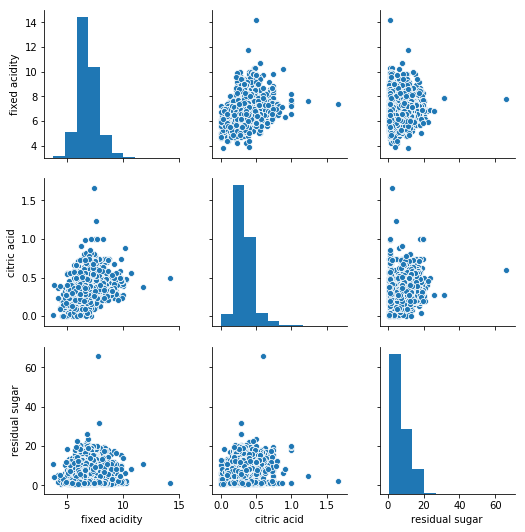

In [315]:
# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(data = wine_dataset, vars = ['fixed acidity', 'citric acid', 'residual sugar'])

plt.show()

### `df_fifa` dataset

In [12]:
df_fifa = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'fifa.csv'    
)

df_fifa.head()

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
0,1001,GÃ¡bor KirÃ¡ly,69,GK,191,Right,0,,,,,,,70,66,63,74,35,66.0
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,,,,,,NaN
2,100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74,,,,,,NaN
3,100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71,,,,,,NaN
4,100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66,,,,,,NaN


### `df_weather` dataset

In [13]:
df_weather = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'weather_data_austin_2010.csv',
    p_index_col    = 'Date',
    p_parse_dates  = True
)


df_weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


### `df_departures` dataset

In [14]:
df_departures = hf.read_csv(
    p_dir             = hf.DATA_RAW_DIR, 
    p_file_name       = 'austin_airport_departure_data_2015_july.csv',     
    p_index_col       = 'Date (MM/DD/YYYY)',    
    p_parse_dates     = True,
    p_skiprows        = list(range(0, 15))+[1757]    
)


df_departures.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,,
2015-07-01,WN,103,N8607M,MDW,06:30,06:52,165,147,22,07:01,9,0,0,0,0,0,NaN
2015-07-01,WN,144,N8609A,SAN,20:55,20:50,170,158,-5,21:03,13,0,0,0,0,0,NaN
2015-07-01,WN,178,N646SW,ELP,20:30,20:45,90,80,15,20:55,10,0,0,0,0,0,NaN
2015-07-01,WN,232,N204WN,ATL,05:45,05:49,135,137,4,06:01,12,0,0,0,0,0,NaN
2015-07-01,WN,238,N233LV,DAL,12:30,12:34,55,48,4,12:41,7,0,0,0,0,0,NaN


---

### `sample_dates_1` and `sample_dates_2` datasets

In [15]:
sample_dates_1 = hf.read_csv(
    p_dir             = hf.DATA_RAW_DIR, 
    p_file_name       = 'sample_dates_1.csv',     
    p_index_col       = 'Date',    
    p_parse_dates     = True    
)

sample_dates_2 = hf.read_csv(
    p_dir             = hf.DATA_RAW_DIR, 
    p_file_name       = 'sample_dates_2.csv',     
    p_index_col       = 'Date',    
    p_parse_dates     = True    
)

In [10]:
sample_dates_1.tail()

,Seq
Date,
2016-07-13,12
2016-07-14,13
2016-07-15,14
2016-07-16,15
2016-07-17,16


In [11]:
sample_dates_2.tail()

,Seq
Date,
2016-07-11,6
2016-07-12,7
2016-07-13,8
2016-07-14,9
2016-07-15,10


### `election` dataset

In [16]:
election = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'pennsylvania2012_turnout.csv',
    p_index_col    = 'county'
)

election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118



### `titanic` dataset

In [17]:
titanic = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'titanic.csv'    
)

titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


### `pittsburgh_weather` dataset 

In [18]:
pittsburgh_weather = hf.read_csv(
    p_dir          = hf.DATA_RAW_DIR, 
    p_file_name    = 'pittsburgh_weather_data.csv'    
)

pittsburgh_weather.head(2)

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,Mean Dew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2013-1-1,32,28,21,30,27,16,100,89,77,...,10,6,2,10,8,NaN,0.0,8,Snow,277
1,2013-1-2,25,21,17,14,12,10,77,67,55,...,10,10,10,14,5,NaN,0.0,4,NaN,272


---

## Lists

### update/replace list elements

In [78]:
areas

['hallway',
 11.25,
 'kitchen',
 18.0,
 'living room',
 20.0,
 'bedroom',
 10.75,
 'bathroom',
 9.5,
 'bedroom',
 'Mendy']

In [87]:
areas[-12]

'hallway'

In [90]:
areas

['hallway',
 11.25,
 'kitchen',
 18.0,
 'living room',
 20.0,
 'bedroom',
 10.75,
 'bathroom',
 9.5,
 'bedroom',
 10.5]

In [89]:
# Correct the bathroom area
areas[-1] = 10.50

In [16]:
# Change "living room" to "chill zone"
areas[4] = "chill zone"

In [40]:
areas

['hallway',
 11.25,
 'kitchen',
 18.0,
 'living room',
 20.0,
 'bedroom',
 10.75,
 'bathroom',
 9.5,
 'bedroom',
 'Mendy']

In [70]:
a = 3

In [71]:
a

3

In [72]:
b = a

In [73]:
b

3

In [74]:
b = 5

In [75]:
b

5

In [76]:
a

3

In [118]:
a = [1, 2, 'hi']

In [119]:
a

[1, 2, 'hi']

In [120]:
b = a[:]

In [121]:
b

[1, 2, 'hi']

In [122]:
b.append('cheese')

In [123]:
b

[1, 2, 'hi', 'cheese']

In [124]:
a

[1, 2, 'hi']

### insert/extend/append a list using
- `+ operater`
- `append method`

In [91]:
areas

['hallway',
 11.25,
 'kitchen',
 18.0,
 'living room',
 20.0,
 'bedroom',
 10.75,
 'bathroom',
 9.5,
 'bedroom',
 10.5]

In [92]:
areas_2 = areas + ["poolhouse", 24.5]

In [96]:
areas

['hallway',
 11.25,
 'kitchen',
 18.0,
 'living room',
 20.0,
 'bedroom',
 10.75,
 'bathroom',
 9.5,
 'bedroom',
 10.5]

In [98]:
areas.append(
    [1, 2, 3]
)
# areas.append()

areas

['hallway',
 11.25,
 'kitchen',
 18.0,
 'living room',
 20.0,
 'bedroom',
 10.75,
 'bathroom',
 9.5,
 'bedroom',
 10.5,
 'zoooooooo',
 [1, 2, 3]]

In [101]:
areas[-1]

[1, 2, 3]

In [102]:
1+2

3

### copy a list 
- If you want to prevent changes that happen in `areas_copy` from also effecting `areas`, you'll have to do a more explicit copy of the `areas` list. 
- You can do this with `list()` or by using `[:]`

In [21]:
areas_copy_1 = list(areas)

areas_copy_1[3] = 555555.0

# -- --------------------------

print(areas)
print(areas_copy_1)

['hallway', 11.25, 'kitchen', 18.0, 'chill zone', 20.0, 'bedroom', 10.75, 'bathroom', 9.5, 'bedroom', 10.5, 'bedroom', 3.75]
['hallway', 11.25, 'kitchen', 555555.0, 'chill zone', 20.0, 'bedroom', 10.75, 'bathroom', 9.5, 'bedroom', 10.5, 'bedroom', 3.75]


In [125]:
areas_copy_2 = areas[:]

areas_copy_2[3] = 9999999.0

# -- --------------------------

print(areas)
print(areas_copy_2)

['hallway', 11.25, 'kitchen', 18.0, 'living room', 20.0, 'bedroom', 10.75, 'bathroom', 9.5, 'bedroom', 10.5, 'zoooooooo', [1, 2, 3]]
['hallway', 11.25, 'kitchen', 9999999.0, 'living room', 20.0, 'bedroom', 10.75, 'bathroom', 9.5, 'bedroom', 10.5, 'zoooooooo', [1, 2, 3]]


In [136]:
p_name = "mendy"
print("hi wazzzzzup", p_name)

hi wazzzzzup mendy


In [169]:
def print_and_say_hello(p_name, p_salary, p_kids):
    
    p_salary = p_salary * 5
    
    v_kids = p_kids[:]
    
    v_kids.append("Moishy")
    
    print("Hello", p_name)
    
    print("Your new salary is", p_salary)
    
    print("Your kids", v_kids)
    
    print("Goodbye")



In [170]:

v_name   = "Shmaryunkee"
v_salary = 1000000

v_kids   = ["Berel", "Shmerel"] 


print_and_say_hello(
    p_name   = v_name, 
    p_salary = v_salary,
    p_kids   = v_kids
)


Hello Shmaryunkee
Your new salary is 5000000
Your kids ['Berel', 'Shmerel', 'Moishy']
Goodbye


In [171]:
print(v_name)
print(v_salary)
print(v_kids)

Shmaryunkee
1000000
['Berel', 'Shmerel']


### get the index of a list element

In [182]:
areas

['hallway',
 11.25,
 'atom bomb',
 18.0,
 'living room',
 20.0,
 'zoo',
 10.75,
 'bathroom',
 9.5,
 'bedroom',
 10.5,
 'zoooooooo',
 [1, 2, 3]]

In [174]:
areas.index('kitchen')

2

In [179]:
v_index = areas.index('bedroom')

areas[v_index] = 'zoo'

### count how many times an element appears in a list

In [181]:
areas.count(11.25)

1

### reverse the order of the elements in a list

In [186]:
print(areas)

[areas.reverse()].reverse()



[[1, 2, 3], 'zoooooooo', 10.5, 'bedroom', 9.5, 'bathroom', 10.75, 'zoo', 20.0, 'living room', 18.0, 'atom bomb', 11.25, 'hallway']


### loop with indexes and values

In [201]:
rhymes = ["chat", "cat", "bat", "sat"]

In [208]:
zzz = enumerate(rhymes)

In [211]:
list(zzz)

[(0, 'chat'), (1, 'cat'), (2, 'bat'), (3, 'sat')]

In [207]:
for idx, rhyme in zzz:
    print("I'm right now in loop number", idx)
    print("Rhyme", rhyme)

I'm right now in loop number 0
Rhyme chat
I'm right now in loop number 1
Rhyme cat
I'm right now in loop number 2
Rhyme bat
I'm right now in loop number 3
Rhyme sat


In [212]:
for rhyme in rhymes:    
    print("hello", rhyme)

hello chat
hello cat
hello bat
hello sat


In [292]:
korbanos_amount = [
    [99, 'cow'],
    [100, 'dove'],
    [18, 'goat']
]

korbanos_amount

[[99, 'cow'], [100, 'dove'], [18, 'goat']]

In [293]:
hf.loop_and_print_list(korbanos_amount)

List item [99, 'cow']
List item [100, 'dove']
List item [18, 'goat']


In [236]:
# loop 0
a = korbanos_amount[0][0]
b = korbanos_amount[0][1]

print(a, b)

a = korbanos_amount[1][0]
b = korbanos_amount[1][1]

print(a, b)

a = korbanos_amount[2][0]
b = korbanos_amount[2][1]

print(a, b)

99 cow
100 dove
18 goat


In [237]:
for a, b in korbanos_amount:
    print(a, b)

99 cow
100 dove
18 goat


In [241]:


nums = [1, 2, 3, 4, 5]


cats = []

for n in nums:
    cats.append(n)
    cats.append('hi')



In [242]:
cats

[1, 'hi', 2, 'hi', 3, 'hi', 4, 'hi', 5, 'hi']

In [251]:
1+1





2

In [252]:
"Hi "+"bye"

'Hi bye'

In [254]:
"Hi "+str(1)

'Hi 1'

--- 
### List Comprehensions

In [245]:

nums = [1, 7, 13, 4, 45]

In [255]:
[n for n in nums]

[1, 7, 13, 4, 45]

In [256]:
[n-2 for n in nums]

[-1, 5, 11, 2, 43]

In [257]:
["Hi "+str(x) for x in nums]

['Hi 1', 'Hi 7', 'Hi 13', 'Hi 4', 'Hi 45']

In [259]:
[n for n in nums if n > 7]

[13, 45]

--- 

### Range

In [268]:
range(10)

range(0, 10)

--- 
### List Comprehensions - on list of lists

In [271]:
korbanos_amount = [
    [99, 'cow'],
    [100, 'dove'],
    [18, 'goat']
]


In [272]:
korbanos_amount

[[99, 'cow'], [100, 'dove'], [18, 'goat']]

In [282]:
[k for k in korbanos_amount if k[0] > 50]

[[99, 'cow'], [100, 'dove']]

In [275]:
a = 1

In [278]:
b = 2

In [279]:
a == b

False

In [285]:
if 10 > 50:
    print('yep')
else:
    print('nope')

nope


In [214]:
for idx, rhyme in enumerate(rhymes) :
    print("I'm right now in loop number", idx, "Rhyme", rhyme)
    

I'm right now in loop number 0 Rhyme chat
I'm right now in loop number 1 Rhyme cat
I'm right now in loop number 2 Rhyme bat
I'm right now in loop number 3 Rhyme sat


### loop over list of lists

In [27]:
house = [
    ["hallway",     11.25], 
    ["kitchen",     18.0], 
    ["living room", 20.0], 
    ["bedroom",     10.75], 
    ["bathroom",    9.50]
]
         
for x in house :
    print("the " + str(x[0]) + " is " + str(x[1]) + " sqm")

the hallway is 11.25 sqm
the kitchen is 18.0 sqm
the living room is 20.0 sqm
the bedroom is 10.75 sqm
the bathroom is 9.5 sqm


---

## Numpy

### Get **`df`** column into **`numpy array`**

In [28]:
df_baseball.head()

,Name,Team,Position,Height,Weight,Age,PosCategory
0,Adam_Donachie,BAL,Catcher,74,180,22.99,Catcher
1,Paul_Bako,BAL,Catcher,74,215,34.69,Catcher
2,Ramon_Hernandez,BAL,Catcher,72,210,30.78,Catcher
3,Kevin_Millar,BAL,First_Baseman,72,210,35.43,Infielder
4,Chris_Gomez,BAL,First_Baseman,73,188,35.71,Infielder


In [29]:
np_height = df_baseball['Height'].values
np_weight = df_baseball['Weight'].values

print(type(np_height))

<class 'numpy.ndarray'>


### math with `numpy arrays`

In [30]:
np_height_m  = np_height * 0.0254
np_weight_kg = np_weight * 0.453592

bmi = np_weight_kg / np_height_m ** 2

In [31]:
len(np_weight), len(np_height), len(np_height_m), len(np_weight_kg), len(bmi)

(1015, 1015, 1015, 1015, 1015)

### filter/slice `numpy arrays`

#### Example 1

In [32]:
light = bmi < 21

light

array([False, False, False, ..., False, False, False])

In [33]:
bmi[light]

array([20.54255679, 20.54255679, 20.69282047, 20.69282047, 20.34343189,
       20.34343189, 20.69282047, 20.15883472, 19.4984471 , 20.69282047,
       20.9205219 ])

#### Example 2

In [34]:
np_height[100:111]

array([73, 74, 72, 73, 69, 72, 73, 75, 75, 73, 72])

#### Example 3

In [35]:
np_positions = df_fifa[' position'].values
np_heights   = df_fifa[' height'].values

# -- -----------------------------------------------------

# Heights of the goalkeepers: 
gk_heights    = np_heights[np_positions == ' GK']

# Heights of the other players: 
other_heights = np_heights[np_positions != ' GK']

# -- -----------------------------------------------------

print("Median height of goalkeepers   : ", str(np.median(gk_heights)))

print("Median height of other players : ", str(np.median(other_heights)))

Median height of goalkeepers   :  188.0
Median height of other players :  181.0


---

---


### **`np.random`** 

In [36]:
# makes the random numbers predictable
np.random.seed(123)

for x in range(10):
    # retrun random int between 1 and 6
    print(
        np.random.randint(1, 7)
    )

6
3
5
3
2
4
3
4
2
2


In [37]:
# return random number between 0 and 1
np.random.rand()

0.6848297385848633

In [38]:
# return array with random values between 0 and 1
np.random.rand(3,2)

array([[0.4809319 , 0.39211752],
       [0.34317802, 0.72904971],
       [0.43857224, 0.0596779 ]])

In [39]:
# return array with random values between 0 and 1
# can have as many dimensions as you want
np.random.rand(3,2,2)

array([[[0.39804426, 0.73799541],
        [0.18249173, 0.17545176]],

       [[0.53155137, 0.53182759],
        [0.63440096, 0.84943179]],

       [[0.72445532, 0.61102351],
        [0.72244338, 0.32295891]]])

---

---


### **`np.transpose`**

```
In basic terms, np.transpose converts rows to columns.
    
    For example, from this:
    
        [[0 3 2 3 2 1 0]
         [0 1 2 3 4 5 4]
         [0 0 1 0 1 2 3]
         [0 1 2 3 4 5 9]
         [0 1 0 2 1 2 3]
         [0 0 1 2 4 5 6]]
    
    ... to this:
    
        [[0 0 0 0 0 0]
         [3 1 0 1 1 0]
         [2 2 1 2 0 1]
         [3 3 0 3 2 2]
         [2 4 1 4 1 4]
         [1 5 2 5 2 5]
         [0 4 3 9 3 6]]
```

In [40]:
# invent array with random numbers for demo
array = np.random.rand(4,2)

array

array([[0.36178866, 0.22826323],
       [0.29371405, 0.63097612],
       [0.09210494, 0.43370117],
       [0.43086276, 0.4936851 ]])

In [41]:
np.transpose(array)

array([[0.36178866, 0.29371405, 0.09210494, 0.43086276],
       [0.22826323, 0.63097612, 0.43370117, 0.4936851 ]])

---

---

### **`np.linespace`**

- `linspace` creates sequences of evenly spaced values within a defined interval.

In [42]:
np.linspace(
    start = 0, 
    stop  = 100, 
    num   = 5
)

array([  0.,  25.,  50.,  75., 100.])

---

In [43]:
np.linspace(
    start = 0, 
    stop  = 1, 
    num   = 11
)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

---
## Dataframes

---

### **`df.info()`**

In [44]:
df_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8847 entries, 0 to 8846
Data columns (total 19 columns):
id              8847 non-null int64
 name           8847 non-null object
 rating         8847 non-null int64
 position       8847 non-null object
 height         8847 non-null int64
 foot           8847 non-null object
 rare           8847 non-null int64
 pace           8847 non-null object
 shooting       8847 non-null object
 passing        8847 non-null object
 dribbling      8847 non-null object
 defending      8847 non-null object
 heading        8847 non-null object
 diving         8847 non-null object
 handling       8847 non-null object
 kicking        8847 non-null object
 reflexes       8847 non-null object
 speed          8847 non-null object
 positioning    930 non-null float64
dtypes: float64(1), int64(4), object(14)
memory usage: 1.3+ MB


---

### **`df.describe()`**

In [45]:
df_fifa.describe()

,id,rating,height,rare,positioning
count,8847.000000,8847.000000,8847.000000,8847.000000,930.000000
mean,152337.538035,66.680457,181.750424,0.353114,64.955914
std,54506.606056,7.146679,6.454356,0.477965,8.854231
min,2.000000,40.000000,158.000000,0.000000,37.000000
25%,140001.500000,62.000000,178.000000,0.000000,59.000000
50%,171578.000000,66.000000,182.000000,0.000000,65.000000
75%,189185.000000,72.000000,186.000000,1.000000,71.000000
max,205583.000000,94.000000,208.000000,1.000000,91.000000


---

### **`df.shape`**

In [46]:
df_fifa.shape

(8847, 19)

---

### **get `df` column names**

In [47]:
df_fifa.head()

,id,name,rating,position,height,foot,rare,pace,shooting,passing,dribbling,defending,heading,diving,handling,kicking,reflexes,speed,positioning
0,1001,GÃ¡bor KirÃ¡ly,69,GK,191,Right,0,,,,,,,70,66,63,74,35,66.0
1,100143,Frederik Boi,65,M,184,Right,0,61,65,63,59,62,62,,,,,,NaN
2,100264,Tomasz Szewczuk,57,A,185,Right,0,65,54,43,53,55,74,,,,,,NaN
3,100325,Steeve Joseph-Reinette,63,D,180,Left,0,68,38,51,46,64,71,,,,,,NaN
4,100326,Kamel Chafni,72,M,181,Right,0,75,64,67,72,57,66,,,,,,NaN


In [48]:
df_fifa.columns

Index(['id', ' name', ' rating', ' position', ' height', ' foot', ' rare',
       ' pace', ' shooting', ' passing', ' dribbling', ' defending',
       ' heading', ' diving', ' handling', ' kicking', ' reflexes', ' speed',
       ' positioning'],
      dtype='object')

---

### Update df column names (using method chaining)

In [49]:
df_departures.columns

Index(['  Carrier Code', 'Flight Number', 'Tail Number',
       'Destination Airport ', 'Scheduled Departure Time',
       'Actual Departure Time', 'Scheduled Elapsed Time(Minutes)',
       'Actual Elapsed Time(Minutes)', 'Departure Delay(Minutes)',
       'Wheels-off Time', 'Taxi-out Time(Minutes)', 'DelayCarrier(Minutes)',
       'DelayWeather(Minutes)', 'DelayNational Aviation System(Minutes)',
       'DelaySecurity(Minutes)', 'DelayLate Aircraft Arrival(Minutes)',
       'Unnamed: 17'],
      dtype='object')

In [50]:
# Strip extra whitespace from the column names: 
df_departures.columns = df_departures.columns.str.strip()

df_departures.columns

Index(['Carrier Code', 'Flight Number', 'Tail Number', 'Destination Airport',
       'Scheduled Departure Time', 'Actual Departure Time',
       'Scheduled Elapsed Time(Minutes)', 'Actual Elapsed Time(Minutes)',
       'Departure Delay(Minutes)', 'Wheels-off Time', 'Taxi-out Time(Minutes)',
       'DelayCarrier(Minutes)', 'DelayWeather(Minutes)',
       'DelayNational Aviation System(Minutes)', 'DelaySecurity(Minutes)',
       'DelayLate Aircraft Arrival(Minutes)', 'Unnamed: 17'],
      dtype='object')

---

---


### **convert list to dict to dataframe using `zip`**

In [51]:
list_keys = ['Country', 'Total']

list_values = [
    ['United States', 'Soviet Union', 'United Kingdom'], 
    [1118, 473, 273]
]

In [52]:
# Zip the 2 lists together into one list of (key,value) tuples: zipped
zipped = list(zip(list_keys, list_values))

zipped

[('Country', ['United States', 'Soviet Union', 'United Kingdom']),
 ('Total', [1118, 473, 273])]

In [53]:
# Build a dictionary with the zipped list: data
data = dict(zipped)

data

{'Country': ['United States', 'Soviet Union', 'United Kingdom'],
 'Total': [1118, 473, 273]}

In [54]:
df = pd.DataFrame(data)

df.head()

,Country,Total
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


---

### **update df column names**

In [55]:
list_labels = ['Country Name', 'Total Amount']

df.columns = list_labels

df.head()

,Country Name,Total Amount
0,United States,1118
1,Soviet Union,473
2,United Kingdom,273


### **convert dict to dataframe**

In [56]:
names = ['United States', 'Australia', 'Japan', 'India', 'Russia', 'Morocco', 'Egypt']
dr    =  [True, False, False, False, True, True, True]
cpc   = [809, 731, 588, 18, 200, 70, 45]

# -- -------------------------------------------

my_dict = {
    'country':names,
    'drives_right':dr,
    'cars_per_cap':cpc
}

# -- -------------------------------------------

df = pd.DataFrame(my_dict)

df

,country,drives_right,cars_per_cap
0,United States,True,809
1,Australia,False,731
2,Japan,False,588
3,India,False,18
4,Russia,True,200
5,Morocco,True,70
6,Egypt,True,45


### **update/rename df row labels**

In [57]:
row_labels = ['US', 'AUS', 'JAP', 'IN', 'RU', 'MOR', 'EG']

df.index = row_labels

df

,country,drives_right,cars_per_cap
US,United States,True,809
AUS,Australia,False,731
JAP,Japan,False,588
IN,India,False,18
RU,Russia,True,200
MOR,Morocco,True,70
EG,Egypt,True,45


---
### **create `df` with broadcasting**

In [58]:
state = 'PA'

cities = [
    'Manheim',
    'Preston park',
    'Biglerville',
    'Indiana',
    'Curwensville',
    'Crown',
    'Harveys lake',
    'Mineral springs',
    'Cassville',
    'Hannastown',
    'Saltsburg',
    'Tunkhannock',
    'Pittsburgh',
    'Lemasters',
    'Great bend'
]

In [59]:
data = {'state': state, 'city': cities}

data

{'state': 'PA',
 'city': ['Manheim',
  'Preston park',
  'Biglerville',
  'Indiana',
  'Curwensville',
  'Crown',
  'Harveys lake',
  'Mineral springs',
  'Cassville',
  'Hannastown',
  'Saltsburg',
  'Tunkhannock',
  'Pittsburgh',
  'Lemasters',
  'Great bend']}

In [60]:
df = pd.DataFrame(data)

df.head()

,state,city
0,PA,Manheim
1,PA,Preston park
2,PA,Biglerville
3,PA,Indiana
4,PA,Curwensville


---

### Create new `df` with some cols: **`df[[col_1, col_2, col3]]`** 

In [61]:
election.head(2)

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399


In [62]:
results = election[['winner', 'total', 'voters']]

results.head(2)

,winner,total,voters
county,,,
Adams,Romney,41973,61156
Allegheny,Obama,614671,924351


---

### Filter `df` rows with row labels: **`df.loc[from:to]`** 

In [63]:
election.loc['Perry':'Potter']

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Perry,PA,18240,29.769737,68.591009,Romney,27245,66.948064,38.821272
Philadelphia,PA,653598,85.224251,14.051451,Obama,1099197,59.461407,71.172800
Pike,PA,23164,43.904334,54.882576,Romney,41840,55.363289,10.978242
Potter,PA,7205,26.259542,72.158223,Romney,10913,66.022175,45.898681


---

### Filter `df` rows **in reverse** with row labels: **`df.loc[from:to]`** 

In [64]:
election.loc['Potter':'Perry':-1]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Potter,PA,7205,26.259542,72.158223,Romney,10913,66.022175,45.898681
Pike,PA,23164,43.904334,54.882576,Romney,41840,55.363289,10.978242
Philadelphia,PA,653598,85.224251,14.051451,Obama,1099197,59.461407,71.172800
Perry,PA,18240,29.769737,68.591009,Romney,27245,66.948064,38.821272


---

### Filter/Slice df: **`df.loc[ from_row:to_row, from_col:to_col]`**

In [65]:
election.loc[:, :'Obama'].head(2)

,state,total,Obama
county,,,
Adams,PA,41973,35.482334
Allegheny,PA,614671,56.640219


In [66]:
election.loc[:, 'Obama':'winner'].head(2)

,Obama,Romney,winner
county,,,
Adams,35.482334,63.112001,Romney
Allegheny,56.640219,42.185820,Obama


In [67]:
election.loc[:, 'Romney':].head(2)

,Romney,winner,voters,turnout,margin
county,,,,,
Adams,63.112001,Romney,61156,68.632677,27.629667
Allegheny,42.185820,Obama,924351,66.497575,14.454399


---

### Filter/Slice df: **`df.loc[ from_row:to_row, from_col:to_col]`** with **lists**

In [68]:
rows = ['Philadelphia', 'Centre', 'Fulton']

cols = ['winner', 'Obama', 'Romney']

election.loc[rows, cols].head(2)

,winner,Obama,Romney
county,,,
Philadelphia,Obama,85.224251,14.051451
Centre,Romney,48.948416,48.977486


---

### Filter `df` rows using boolean in 2 steps

In [69]:
turnout_72 = election.turnout > 72

turnout_72.head(2)

county
Adams        False
Allegheny    False
Name: turnout, dtype: bool

In [70]:
election[turnout_72]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Bucks,PA,319407,49.966970,48.801686,Obama,435606,73.324748,1.165284
Butler,PA,88924,31.920516,66.816607,Romney,122762,72.436096,34.896091
Chester,PA,248295,49.228539,49.650617,Romney,337822,73.498766,0.422079
Montgomery,PA,401787,56.637223,42.286834,Obama,551105,72.905708,14.350390


---

### Filter `df` rows using boolean in 1 step

In [71]:
election[election.turnout > 72]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Bucks,PA,319407,49.966970,48.801686,Obama,435606,73.324748,1.165284
Butler,PA,88924,31.920516,66.816607,Romney,122762,72.436096,34.896091
Chester,PA,248295,49.228539,49.650617,Romney,337822,73.498766,0.422079
Montgomery,PA,401787,56.637223,42.286834,Obama,551105,72.905708,14.350390


---

### Update a col's values based on a filter of another col

In [72]:
too_close = election.margin < 1

election[too_close]

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Berks,PA,163253,48.939376,49.528646,Romney,250356,65.208343,0.589269
Centre,PA,68801,48.948416,48.977486,Romney,112949,60.913333,0.029069
Chester,PA,248295,49.228539,49.650617,Romney,337822,73.498766,0.422079


In [73]:
election.winner[too_close] = np.nan

election[too_close]

/home/laz/anaconda3/envs/springboard/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Berks,PA,163253,48.939376,49.528646,NaN,250356,65.208343,0.589269
Centre,PA,68801,48.948416,48.977486,NaN,112949,60.913333,0.029069
Chester,PA,248295,49.228539,49.650617,NaN,337822,73.498766,0.422079


---

### Get rows with one or more NaN values 

In [74]:
df_age_cabin = titanic.loc[:, ['age', 'cabin']]

df_age_cabin.head(2)

,age,cabin
0,29.00,B5
1,0.92,C22 C26


In [75]:
row_has_nan = df_age_cabin.isna().any(axis=1)

df_age_cabin[row_has_nan].head()

,age,cabin
9,71.0,NaN
13,26.0,NaN
15,NaN,NaN
23,42.0,NaN
25,25.0,NaN


---

### Get new df while dropping ROWS where ANY value is NaN


In [76]:
df_with_no_nan = df_age_cabin.dropna(how='any')

df_with_no_nan.head(2)

,age,cabin
0,29.00,B5
1,0.92,C22 C26


In [77]:
df_with_no_nan.shape

(272, 2)

### Get new df while dropping ROWS where ALL values are NaN

In [78]:
df_clean = df_age_cabin.dropna(how='all')

df_clean.head(2)

,age,cabin
0,29.00,B5
1,0.92,C22 C26


In [79]:
df_clean.shape

(1069, 2)

---

### Get new `df` while dopping COLUMNS where more than a 1000 of its values are NaN

In [80]:
titanic.shape

(1309, 14)

In [81]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [82]:
df_clean_cols = titanic.dropna(thresh=1000, axis='columns')

df_clean_cols.shape

(1309, 10)

In [83]:
df_clean_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
pclass      1309 non-null int64
survived    1309 non-null int64
name        1309 non-null object
sex         1309 non-null object
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
embarked    1307 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 102.3+ KB


---

### Apply any function on a **`df`**'s cols: **`.apply()`**

In [84]:
def to_celsius(F):
    return 5/9*(F - 32)

In [85]:
to_celsius(98.5)

36.94444444444444

---

In [86]:
pittsburgh_weather.head(2)

,Date,Max TemperatureF,Mean TemperatureF,Min TemperatureF,Max Dew PointF,Mean Dew PointF,Min DewpointF,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityMiles,Mean VisibilityMiles,Min VisibilityMiles,Max Wind SpeedMPH,Mean Wind SpeedMPH,Max Gust SpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2013-1-1,32,28,21,30,27,16,100,89,77,...,10,6,2,10,8,NaN,0.0,8,Snow,277
1,2013-1-2,25,21,17,14,12,10,77,67,55,...,10,10,10,14,5,NaN,0.0,4,NaN,272


In [87]:
df_celsius = pittsburgh_weather[
    ['Mean TemperatureF', 'Mean Dew PointF']
].apply(to_celsius)

df_celsius.head(2)

,Mean TemperatureF,Mean Dew PointF
0,-2.222222,-2.777778
1,-6.111111,-11.111111


In [88]:
# Rename the columns
df_celsius.columns = ['Mean TemperatureC', 'Mean Dew PointC']

df_celsius.head(2)

,Mean TemperatureC,Mean Dew PointC
0,-2.222222,-2.777778
1,-6.111111,-11.111111


---

### Run a column thru a dictionary look-up: **`.map`**

In [89]:
election.head(2)

,state,total,Obama,Romney,winner,voters,turnout,margin
county,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399


In [90]:
# Create the dictionary: 
red_vs_blue = {'Obama':'blue', 'Romney':'red'}

new_col = election['winner'].map(red_vs_blue)

new_col.head()

county
Adams         red
Allegheny    blue
Armstrong     red
Beaver        red
Bedford       red
Name: winner, dtype: object

In [91]:
type(new_col)

pandas.core.series.Series

---

### Add **`series`** as new col to **`df`**

In [92]:
election['color'] = new_col

election.head(2)

,state,total,Obama,Romney,winner,voters,turnout,margin,color
county,,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue


---

### Using vectorized functions - **these are the quickest!**

In [93]:
turnout_zscore = zscore(election['turnout'])

type(turnout_zscore)

numpy.ndarray

In [94]:
print(turnout_zscore)

[ 0.85373443  0.43984633  0.57565034  1.01864668  0.46339055  0.18992961
 -1.62978766 -1.67811834  1.76328918  1.59102463  0.4115648  -2.00690534
 -0.41140691 -0.64265536  1.79702245 -0.21292049 -0.36907863 -1.76358992
 -0.63882099 -0.72673199  1.02421347  0.83473876  0.86101802 -0.58691702
 -0.09392156 -2.26015319  1.39228937  1.47758532  0.30389161 -0.71004763
 -0.62292272 -0.22739249 -0.8586792   1.11463935  0.14408255  1.08675066
 -0.25721482  0.3426399  -0.04498491 -0.09489986  0.71129079 -1.19644405
 -0.06680477  0.48399098 -1.89069251  1.68205856 -1.28403638 -0.79798793
 -1.33971045  0.52717328 -0.9241102  -1.71852766  0.34769042  0.46386596
  0.99379745  0.21159213  0.95701947  0.83419812 -0.56442943  0.65096061
 -0.16243951 -1.4886646  -0.18238803  0.02514726  1.29021923  0.14757638
  0.44085587]


In [95]:
# Assign turnout_zscore to a new column
election['turnout_zscore'] = turnout_zscore

election.head()

,state,total,Obama,Romney,winner,voters,turnout,margin,color,turnout_zscore
county,,,,,,,,,,
Adams,PA,41973,35.482334,63.112001,Romney,61156,68.632677,27.629667,red,0.853734
Allegheny,PA,614671,56.640219,42.185820,Obama,924351,66.497575,14.454399,blue,0.439846
Armstrong,PA,28322,30.696985,67.901278,Romney,42147,67.198140,37.204293,red,0.575650
Beaver,PA,80015,46.032619,52.637630,Romney,115157,69.483401,6.605012,red,1.018647
Bedford,PA,21444,22.057452,76.986570,Romney,32189,66.619031,54.929118,red,0.463391


---
## Time Series with Pandas

In [96]:
df_weather.head()

,Temperature,DewPoint,Pressure
Date,,,
2010-01-01 00:00:00,46.2,37.5,1.0
2010-01-01 01:00:00,44.6,37.1,1.0
2010-01-01 02:00:00,44.1,36.9,1.0
2010-01-01 03:00:00,43.8,36.9,1.0
2010-01-01 04:00:00,43.5,36.8,1.0


In [97]:
# Notice DatetimeIndex
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8759 entries, 2010-01-01 00:00:00 to 2010-12-31 23:00:00
Data columns (total 3 columns):
Temperature    8759 non-null float64
DewPoint       8759 non-null float64
Pressure       8759 non-null float64
dtypes: float64(3)
memory usage: 273.7 KB


---

### Filter with **`.loc[p_row_filter, p_columns_to_show]`**

In [98]:
# Show records where date month is 2010-August
# Only show Temperature column 
august = df_weather.loc['2010-August', 'Temperature']

august.head()

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

--- 

### Filter with **`df[p_columns_to_show][p_row_filter]`**

In [99]:
aug_1st_half = df_weather['Temperature']['2010-Aug-01':'2010-Aug-15']

aug_1st_half.head()

Date
2010-08-01 00:00:00    79.0
2010-08-01 01:00:00    77.4
2010-08-01 02:00:00    76.4
2010-08-01 03:00:00    75.7
2010-08-01 04:00:00    75.1
Name: Temperature, dtype: float64

--- 

### Filter with **`df.column[p_row_filter]`**

In [100]:
jun_thru_aug = df_weather.Temperature['2010-Jun':'2010-Aug']

jun_thru_aug.head()

Date
2010-06-01 00:00:00    74.0
2010-06-01 01:00:00    72.6
2010-06-01 02:00:00    72.0
2010-06-01 03:00:00    71.6
2010-06-01 04:00:00    71.1
Name: Temperature, dtype: float64

---
### Resampling - downsample with mean

In [101]:
# Downsample to 6 hour data and aggregate by mean
temperature_6h = df_weather['Temperature'].resample('6h').mean()

# Notice DatetimeIndex is now once every 6 hours:
temperature_6h.head()

Date
2010-01-01 00:00:00    44.200000
2010-01-01 06:00:00    45.933333
2010-01-01 12:00:00    57.766667
2010-01-01 18:00:00    49.450000
2010-01-02 00:00:00    44.516667
Freq: 6H, Name: Temperature, dtype: float64

---
### Resampling - downsample with count

In [102]:
# Downsample to daily data and count the number of data points:
temperature_daily_count = df_weather['Temperature'].resample('D').count()

# Notice DatetimeIndex is now once a day:
temperature_daily_count.head()

Date
2010-01-01    24
2010-01-02    24
2010-01-03    24
2010-01-04    24
2010-01-05    24
Freq: D, Name: Temperature, dtype: int64

---
### Resampling - downsample with max

In [103]:
# Downsample to obtain only the daily highest temperatures in August
august_highs = august.resample('D').max()

august_highs.head()

Date
2010-08-01    95.0
2010-08-02    95.0
2010-08-03    95.1
2010-08-04    95.1
2010-08-05    95.1
Freq: D, Name: Temperature, dtype: float64

---
### Rolling mean

In [104]:
unsmoothed = df_weather['Temperature']['2010-Aug-01':'2010-Aug-15']

unsmoothed.tail()

Date
2010-08-15 19:00:00    88.8
2010-08-15 20:00:00    85.5
2010-08-15 21:00:00    83.3
2010-08-15 22:00:00    81.6
2010-08-15 23:00:00    80.0
Name: Temperature, dtype: float64

In [105]:
# Apply a rolling mean with a 24 hour window: 
smoothed = unsmoothed.rolling(window=24).mean()

smoothed.tail()

Date
2010-08-15 19:00:00    84.179167
2010-08-15 20:00:00    84.175000
2010-08-15 21:00:00    84.175000
2010-08-15 22:00:00    84.175000
2010-08-15 23:00:00    84.170833
Name: Temperature, dtype: float64

---
### df from time-series

In [106]:
august = pd.DataFrame({'smoothed':smoothed, 'unsmoothed':unsmoothed})

august.tail()

,smoothed,unsmoothed
Date,,
2010-08-15 19:00:00,84.179167,88.8
2010-08-15 20:00:00,84.175000,85.5
2010-08-15 21:00:00,84.175000,83.3
2010-08-15 22:00:00,84.175000,81.6
2010-08-15 23:00:00,84.170833,80.0


---
### Rolling mean plot

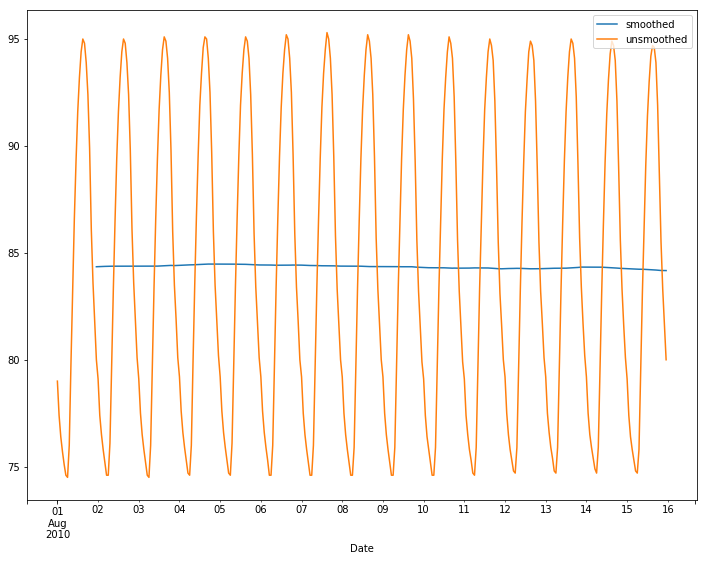

In [107]:
august.plot()
plt.show()

---
### Resampling down to day then getting 7 day moving avg

In [108]:
august = df_weather['Temperature']['2010-August']

# Resample to daily data, aggregating by max
daily_highs = august.resample('D').max()

# Use a rolling 7-day window with method chaining to smooth the daily high temperatures in August
daily_highs_smoothed = daily_highs.rolling(window=7).mean()

In [109]:
daily_highs.tail()

Date
2010-08-27    93.7
2010-08-28    93.5
2010-08-29    93.3
2010-08-30    93.3
2010-08-31    93.1
Freq: D, Name: Temperature, dtype: float64

In [110]:
daily_highs_smoothed.tail()

Date
2010-08-27    94.271429
2010-08-28    94.100000
2010-08-29    93.914286
2010-08-30    93.742857
2010-08-31    93.571429
Freq: D, Name: Temperature, dtype: float64

---
### Filter with **`.contains`** 

In [111]:
df_departures.head()

,Carrier Code,Flight Number,Tail Number,Destination Airport,Scheduled Departure Time,Actual Departure Time,Scheduled Elapsed Time(Minutes),Actual Elapsed Time(Minutes),Departure Delay(Minutes),Wheels-off Time,Taxi-out Time(Minutes),DelayCarrier(Minutes),DelayWeather(Minutes),DelayNational Aviation System(Minutes),DelaySecurity(Minutes),DelayLate Aircraft Arrival(Minutes),Unnamed: 17
Date (MM/DD/YYYY),,,,,,,,,,,,,,,,,
2015-07-01,WN,103,N8607M,MDW,06:30,06:52,165,147,22,07:01,9,0,0,0,0,0,NaN
2015-07-01,WN,144,N8609A,SAN,20:55,20:50,170,158,-5,21:03,13,0,0,0,0,0,NaN
2015-07-01,WN,178,N646SW,ELP,20:30,20:45,90,80,15,20:55,10,0,0,0,0,0,NaN
2015-07-01,WN,232,N204WN,ATL,05:45,05:49,135,137,4,06:01,12,0,0,0,0,0,NaN
2015-07-01,WN,238,N233LV,DAL,12:30,12:34,55,48,4,12:41,7,0,0,0,0,0,NaN


In [112]:
# Extract data for which the destination airport is Dallas: 
dallas = df_departures['Destination Airport'].str.contains('DAL')

dallas.head()

Date (MM/DD/YYYY)
2015-07-01    False
2015-07-01    False
2015-07-01    False
2015-07-01    False
2015-07-01     True
Name: Destination Airport, dtype: bool

---
### Resampling - downsample to day then get stats

In [113]:
# Compute the total number of Dallas departures each day: 
daily_departures = dallas.resample('D').sum()

In [114]:
daily_departures.head()

Date (MM/DD/YYYY)
2015-07-01    10.0
2015-07-02    10.0
2015-07-03    11.0
2015-07-04     3.0
2015-07-05     9.0
Freq: D, Name: Destination Airport, dtype: float64

In [115]:
# Generate the summary statistics for daily Dallas departures: 
stats = daily_departures.describe()

type(stats)

pandas.core.series.Series

In [116]:
stats

count    31.000000
mean      9.322581
std       1.989759
min       3.000000
25%       9.500000
50%      10.000000
75%      10.000000
max      11.000000
Name: Destination Airport, dtype: float64

---
### Missing values and interpolation

In [117]:
sample_dates_1

,Seq
Date,
2016-07-01,0
2016-07-02,1
2016-07-03,2
2016-07-04,3
2016-07-05,4
2016-07-06,5
2016-07-07,6
2016-07-08,7
2016-07-09,8


In [118]:
# Missing days 2, 3, 9, 10, 16, 17
sample_dates_2

,Seq
Date,
2016-07-01,0
2016-07-04,1
2016-07-05,2
2016-07-06,3
2016-07-07,4
2016-07-08,5
2016-07-11,6
2016-07-12,7
2016-07-13,8


---


In [119]:
# Reset the index
sample_dates_2_reindex = sample_dates_2.reindex(sample_dates_1.index)

# Notice the NaNs
sample_dates_2_reindex

,Seq
Date,
2016-07-01,0.0
2016-07-02,NaN
2016-07-03,NaN
2016-07-04,1.0
2016-07-05,2.0
2016-07-06,3.0
2016-07-07,4.0
2016-07-08,5.0
2016-07-09,NaN


In [120]:
# Use linear interpolation to fill in the NaNs: 
sample_dates_2_interp = sample_dates_2_reindex.interpolate(how='linear')

sample_dates_2_interp

,Seq
Date,
2016-07-01,0.000000
2016-07-02,0.333333
2016-07-03,0.666667
2016-07-04,1.000000
2016-07-05,2.000000
2016-07-06,3.000000
2016-07-07,4.000000
2016-07-08,5.000000
2016-07-09,5.333333


---
## Dictionaries 

### dictionary of dictionaries

In [121]:
europe = { 
    'spain'  : { 'capital':'madrid', 'population':46.77 },
    'france' : { 'capital':'paris',  'population':66.03 },
    'germany': { 'capital':'berlin', 'population':80.62 },
    'norway' : { 'capital':'oslo',   'population':5.084 } 
}

### get value at key

In [122]:
europe['france']['capital']

'paris'

### insert/extend/append

In [123]:
data = {'capital':'rome', 'population':59.83}

europe['italy'] = data

In [124]:
europe

{'spain': {'capital': 'madrid', 'population': 46.77},
 'france': {'capital': 'paris', 'population': 66.03},
 'germany': {'capital': 'berlin', 'population': 80.62},
 'norway': {'capital': 'oslo', 'population': 5.084},
 'italy': {'capital': 'rome', 'population': 59.83}}

### loop over dictionary

In [125]:
for key, value in europe.items() :
     print("the capital of " + str(key) + " is " + str(value['capital']))

the capital of spain is madrid
the capital of france is paris
the capital of germany is berlin
the capital of norway is oslo
the capital of italy is rome


---

## General Python

### while loop

In [126]:
# Initialize offset
offset = 8

# Code the while loop
while offset != 0 :
    print("correcting...")
    offset = offset - 1
    print(offset)

correcting...
7
correcting...
6
correcting...
5
correcting...
4
correcting...
3
correcting...
2
correcting...
1
correcting...
0


---

### nested functions

In [127]:
def three_shouts(word1, word2, word3):
    """ Returns a tuple of strings concatenated with '!!!'."""

    def inner(word):
        """Returns a string concatenated with '!!!'."""
        return word + '!!!'

    return (
        inner(word1), 
        inner(word2), 
        inner(word3)
    )

In [128]:
three_shouts('a', 'b', 'c')

('a!!!', 'b!!!', 'c!!!')

---
### function that return a function

In [129]:
def echo(n):
    """Return the inner_echo function."""

    def inner_echo(word1):
        """Concatenate n copies of word1."""
        echo_word = word1 * n
        return echo_word

    return inner_echo

In [130]:
twice = echo(2)

thrice = echo(3)

print(
    twice('hello '), 
    thrice('wazzup ')
)

hello hello  wazzup wazzup wazzup 


---
### lambda function

In [131]:
echo_word = (lambda word1, echo: word1 * echo)

echo_word('hey ', 5)

'hey hey hey hey hey '

---
### map() and lambda functions

In [132]:
spells = ['protego', 'accio', 'expecto patronum', 'legilimens']

shout_spells = map(lambda item: item + '!!!', spells)

In [133]:
shout_spells

In [134]:
list(shout_spells)

['protego!!!', 'accio!!!', 'expecto patronum!!!', 'legilimens!!!']

---
### filter() and lambda functions

In [135]:
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

result = filter(lambda member: len(member) > 6, fellowship)

list(result)

['samwise', 'aragorn', 'legolas', 'boromir']

---

### reduce() and lambda functions

In [136]:
from functools import reduce

# Create a list of strings: stark
stark = ['robb', 'sansa', 'arya', 'eddard', 'jon']

# Use reduce() to apply a lambda function over stark: result
result = reduce(lambda item1, item2: item1 + ',' + item2, stark)


In [137]:
result

'robb,sansa,arya,eddard,jon'

---

### error handling - by raising an error

In [138]:
def shout_echo(word1, echo=1):
    """
    Concatenate echo copies of word1 and three
    exclamation marks at the end of the string.
    """
    
    if echo < 0:
        raise ValueError('echo must be greater than 0')

    echo_word = word1 * echo

    shout_word = echo_word + '!!!'
    
    return shout_word

In [139]:
shout_echo("particle ", echo=5)

'particle particle particle particle particle !!!'

In [140]:
shout_echo("particle ", echo=-3)

ValueError: echo must be greater than 0

---

### convert string to datetime

<h3 
    style="color: red; font-family: Helvetica; line-height: 1"> 
    - Note, however, that datetime without time zone should never really be used!!
</h3>

<h3 
    style="color: red; font-family: Helvetica; line-height: 1">     
    - In fact, specific time-zones should never be used due to ambiguous times (like daylight savings etc.)
</h3>

<h3 
    style="color: red; font-family: Helvetica; line-height: 1">     
    - Always just use UTC !
</h3>

<h3 
    style="color: red; font-family: Helvetica; line-height: 1">     
    - Also, when returning formatted date-time to a caller - always use isoformat.
</h3>

In [141]:
dates_list = [
    '02/19/2001',
    '04/10/2001',
    '05/30/2001',
    '07/19/2001',
    '09/07/2001',
    '10/27/2001',
    '12/16/2001',
    '02/04/2002',
    '03/26/2002',
    '05/15/2002'
]

datetimes_list = []

for date_str in dates_list:
    
    datetimes_list.append(
        datetime.strptime(date_str, '%m/%d/%Y')
    )

In [142]:
datetimes_list

[datetime.datetime(2001, 2, 19, 0, 0),
 datetime.datetime(2001, 4, 10, 0, 0),
 datetime.datetime(2001, 5, 30, 0, 0),
 datetime.datetime(2001, 7, 19, 0, 0),
 datetime.datetime(2001, 9, 7, 0, 0),
 datetime.datetime(2001, 10, 27, 0, 0),
 datetime.datetime(2001, 12, 16, 0, 0),
 datetime.datetime(2002, 2, 4, 0, 0),
 datetime.datetime(2002, 3, 26, 0, 0),
 datetime.datetime(2002, 5, 15, 0, 0)]

---

### time-aware datetime with `dateutil`

In [143]:
now = datetime.now()

now

datetime.datetime(2019, 5, 9, 6, 55, 52, 187735)

In [144]:
# Note how it's None
now.tzinfo

In [145]:
# Note how Time Zone inof is shipped with every operating system
tz.gettz("Europe/Paris")

tzfile('/usr/share/zoneinfo/Europe/Paris')

In [146]:
time_zone = tz.gettz("Europe/Paris")

now.replace(tzinfo=time_zone)

datetime.datetime(2019, 5, 9, 6, 55, 52, 187735, tzinfo=tzfile('/usr/share/zoneinfo/Europe/Paris'))

---

### get local time zone of computer running the code

In [147]:
local_time_zone = tz.gettz()

local_time_zone

tzfile('/etc/localtime')

---

### using UTC

In [148]:
datetime.now(tz = tz.tzutc())

datetime.datetime(2019, 5, 9, 10, 55, 52, 249577, tzinfo=tzutc())

---

### create function to always use UTC

In [149]:
def utcnow():
    return datetime.now(tz = tz.tzutc())

In [150]:
utc_now = utcnow()

utc_now

datetime.datetime(2019, 5, 9, 10, 55, 52, 275723, tzinfo=tzutc())

In [151]:
utc_now_string = utc_now.isoformat()

utc_now_string

'2019-05-09T10:55:52.275723+00:00'

---

### iso8601 to tz-aware datetime

In [152]:
iso8601.parse_date(utc_now_string)

datetime.datetime(2019, 5, 9, 10, 55, 52, 275723, tzinfo=datetime.timezone(datetime.timedelta(0), '+00:00'))

---

### convert datetime to string

In [153]:
for item in datetimes_list:

    # Print out the record as a string in the format of 'MM/DD/YYYY'
    print(item.strftime('%m/%d/%Y'))
        
    # Print out the record as an ISO standard string
    print(item.isoformat())
    print('')

02/19/2001
2001-02-19T00:00:00

04/10/2001
2001-04-10T00:00:00

05/30/2001
2001-05-30T00:00:00

07/19/2001
2001-07-19T00:00:00

09/07/2001
2001-09-07T00:00:00

10/27/2001
2001-10-27T00:00:00

12/16/2001
2001-12-16T00:00:00

02/04/2002
2002-02-04T00:00:00

03/26/2002
2002-03-26T00:00:00

05/15/2002
2002-05-15T00:00:00



---
### create datetime objects

In [154]:
local_dt = datetime.now()

local_dt

datetime.datetime(2019, 5, 9, 6, 55, 52, 314850)

In [155]:
utc_dt = datetime.utcnow()

utc_dt

datetime.datetime(2019, 5, 9, 10, 55, 52, 332619)

---
### time deltas

In [156]:
tatty_bd = datetime.strptime('08/16/1950', '%m/%d/%Y')

my_bd    = datetime.strptime('07/27/1984', '%m/%d/%Y')

print(tatty_bd) 
print(my_bd)

1950-08-16 00:00:00
1984-07-27 00:00:00


In [157]:
timedelta = my_bd - tatty_bd

print(timedelta)

12399 days, 0:00:00


In [158]:
upcoming_date = my_bd + timedelta

print(upcoming_date)

2018-07-08 00:00:00


---
### using **`pendulum`** for dates

In [159]:
tatty_bd_pendulum = pendulum.parse('08/16/1950', strict=False)
my_bd_pendulum    = pendulum.parse('07/27/1984', strict=False)

tatty_bd_pendulum, my_bd_pendulum

(DateTime(1950, 8, 16, 0, 0, 0, tzinfo=Timezone('UTC')),
 DateTime(1984, 7, 27, 0, 0, 0, tzinfo=Timezone('UTC')))

In [160]:
timedelta_pendulum = my_bd_pendulum - tatty_bd_pendulum

timedelta_pendulum.in_words()

'33 years 11 months 1 week 4 days'

In [161]:
timedelta_pendulum.days

12399

In [162]:
my_bd_pendulum.add(days=timedelta_pendulum.days)

DateTime(2018, 7, 8, 0, 0, 0, tzinfo=Timezone('UTC'))